In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from kmodes.kmodes import KModes

In [3]:
df=pd.read_csv("data.csv", encoding='windows-1252')

In [4]:
df.shape

(541909, 8)

In [5]:
#just for Analysis we are checking the top 5 records
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
# We are checking how many records are unique in all columns
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [7]:
# How many null values are there in all column wise data
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Analysis on cancel Orders

In [8]:
# *******This Method is working but it is taking lot of time , this is very clear that iterrows will not work with lot of 
# data. It makes the execution very very slow ***********************

# df_cancel_orders = pd.DataFrame()
# new_rows = []
# for index,row in df.iterrows():
#     if ('C' in row["InvoiceNo"]):
#         new_rows.append(row.values)
#         print(new_rows)
#         df_cancel_orders = df_cancel_orders.append(pd.DataFrame(new_rows, columns=df.columns))

# another way to do that
# df[df['Col A.'].str.contains('[A-Za-z]')]
# filter = "C" in df["InvoiceNo"]

#Selecting the records based on pandas way is lot fastrer than any iteration in pandas
# we will always use selecting the dataframe as below
df_cancel_orders = df[df['InvoiceNo'].str.contains('[A-Za-z]')]


In [9]:
# how many cancel orders are there
df_cancel_orders.shape

(9291, 8)

In [10]:
#Just visualizing top 5 records
df_cancel_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [11]:
#selecting the discounted items
df_discount = df_cancel_orders[df_cancel_orders['Description']=="Discount" ]

In [12]:
# how many items are there with discount price 
df_discount.shape

(77, 8)

In [13]:
#visualizing discounted items
df_discount.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
9038,C537164,D,Discount,-1,12/5/2010 13:21,29.29,14527.0,United Kingdom
14498,C537597,D,Discount,-1,12/7/2010 12:34,281.00,15498.0,United Kingdom
19392,C537857,D,Discount,-1,12/8/2010 16:00,267.12,17340.0,United Kingdom
31134,C538897,D,Discount,-1,12/15/2010 9:14,5.76,16422.0,United Kingdom


In [14]:
#selecting the cancel orders which are not discounted 
df_cancel_orders_actual = df[(df['InvoiceNo'].str.contains('[A-Za-z]')) & (df['StockCode'] !="D")]

In [15]:
#actual cancel orders
df_cancel_orders_actual

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [16]:
# total cancel order percentage
df_cancel_orders_actual.shape[0]/(df.shape[0] - df_cancel_orders_actual.shape[0]) * 100

1.729695228977182

In [17]:
#deleting the null customer ID and taking it into another dataframe
df_CustomerID_cancelOders = df_cancel_orders_actual.dropna(subset=['CustomerID'])

In [18]:
df_CustomerID_cancelOders.shape

(8828, 8)

In [19]:
df_CustomerID_cancelOders.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [20]:
#find the users those cancelled the maximum times
df_CustomerID_Groupby = df_CustomerID_cancelOders.groupby('CustomerID')

In [21]:
df_CustomerID_Groupby.first()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,,,,,,,
12346.0,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,United Kingdom
12352.0,C545329,M,Manual,-1,3/1/2011 15:47,280.05,Norway
12359.0,C549955,22839,3 TIER CAKE TIN GREEN AND CREAM,-2,4/13/2011 13:38,14.95,Cyprus
12362.0,C544902,22629,SPACEBOY LUNCH BOX,-1,2/24/2011 13:05,1.95,Belgium
12365.0,C544577,M,Manual,-1,2/21/2011 14:02,320.69,Cyprus
...,...,...,...,...,...,...,...
18272.0,C552720,84817,DANISH ROSE DECORATIVE PLATE,-2,5/11/2011 9:49,2.10,United Kingdom
18274.0,C577832,84988,SET OF 72 PINK HEART PAPER DOILIES,-12,11/22/2011 10:18,1.45,United Kingdom
18276.0,C577386,23401,RUSTIC MIRROR WITH LACE HEART,-1,11/18/2011 16:54,6.25,United Kingdom


In [22]:
df_CustomerID_Groupby.first().shape

(1585, 7)

In [23]:
#getting the group to see how it 
# df_CustomerID_Groupby.get_group(17548).agg('count')
# df_CustomerID_Groupby.agg('count')
df_groupbyCount = df_CustomerID_Groupby.size()
df_groupbyCount

CustomerID
12346.0     1
12352.0    10
12359.0     6
12362.0     8
12365.0     1
           ..
18272.0     4
18274.0    11
18276.0     2
18277.0     1
18282.0     1
Length: 1585, dtype: int64

In [24]:
#plotting 
df_CustomerID_cancelOders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


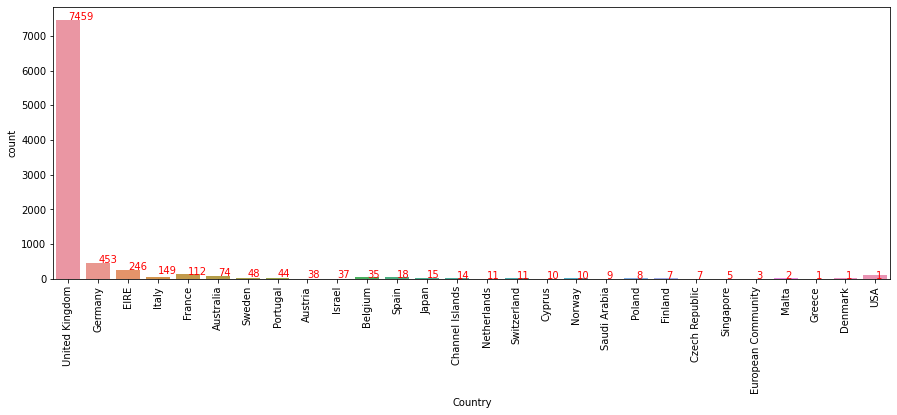

In [25]:
# Cancel Order countrywise
cancel_count = []
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
s = df_CustomerID_cancelOders['Country'].value_counts()
ax = sns.countplot(x="Country", data=df_CustomerID_cancelOders)
plt.xticks(rotation=90)
for i, v in s.reset_index().iterrows():
    ax.text(i, v.Country + 0.2 , v.Country, color='red')
#     cancel_count.append(v.Country)

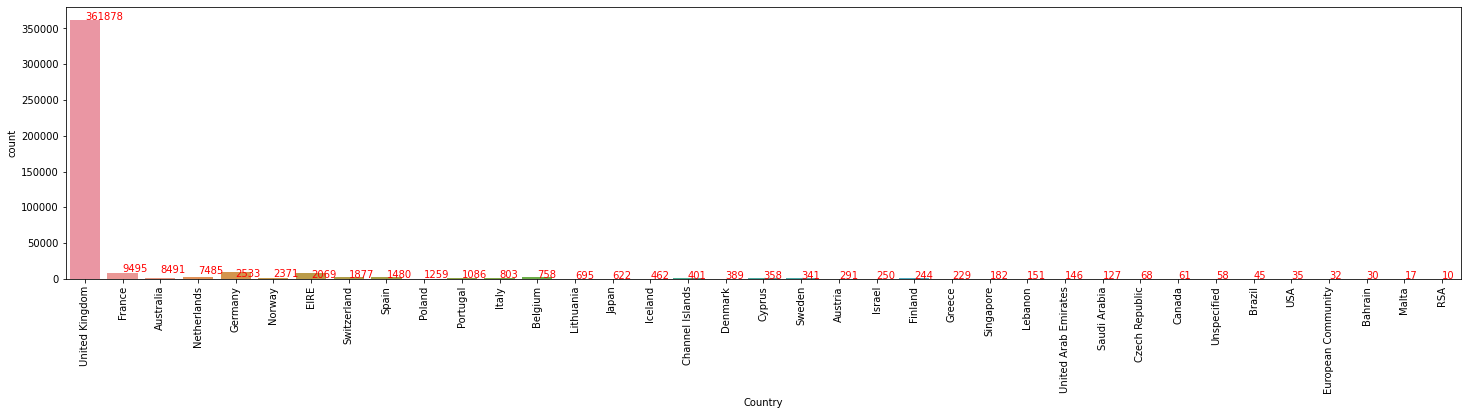

In [26]:
#if cancel orders are more then lets check the total Orders countyWise
total_count = []
df_actual_orders_countryWise = df.copy()
df_actual_orders_countryWise = df_actual_orders_countryWise.dropna(subset=['CustomerID'])
fig_dims = (25, 5)
fig, ax = plt.subplots(figsize=fig_dims)
s = df_actual_orders_countryWise['Country'].value_counts()
ax = sns.countplot(x="Country", data=df_actual_orders_countryWise)
plt.xticks(rotation=90)
for i, v in s.reset_index().iterrows():
    ax.text(i, v.Country + 0.2 , v.Country, color='red')
#     total_count.append(v.Country)

In [27]:
# cancel order percentage countrywise 


In [28]:
x = df_CustomerID_cancelOders['Country'].value_counts()
y = df_actual_orders_countryWise['Country'].value_counts()


In [29]:
print(x.index)
print(x.values)

Index(['United Kingdom', 'Germany', 'EIRE', 'France', 'USA', 'Australia',
       'Spain', 'Italy', 'Belgium', 'Japan', 'Switzerland', 'Portugal',
       'Malta', 'Norway', 'Sweden', 'Poland', 'Finland', 'Channel Islands',
       'Denmark', 'Cyprus', 'Netherlands', 'Singapore', 'Czech Republic',
       'Austria', 'Israel', 'Greece', 'European Community', 'Saudi Arabia'],
      dtype='object')
[7459  453  246  149  112   74   48   44   38   37   35   18   15   14
   11   11   10   10    9    8    7    7    5    3    2    1    1    1]


In [30]:
df_cancel = pd.DataFrame({'Country':x.index, 'Cancel_Count':x.values})
df_cancel.head()

,Country,Cancel_Count
0,United Kingdom,7459
1,Germany,453
2,EIRE,246
3,France,149
4,USA,112


In [31]:
df_total = pd.DataFrame({'Country':y.index, 'Total_Count':y.values})
df_total.head()

,Country,Total_Count
0,United Kingdom,361878
1,Germany,9495
2,France,8491
3,EIRE,7485
4,Spain,2533


In [32]:
df_merged = pd.merge(df_total, df_cancel, how='left', on='Country')
df_merged = df_merged.fillna(0)
df_merged['Cancel_Count'] = df_merged['Cancel_Count'].astype(int)
df_merged.head()

,Country,Total_Count,Cancel_Count
0,United Kingdom,361878,7459
1,Germany,9495,453
2,France,8491,149
3,EIRE,7485,246
4,Spain,2533,48


In [33]:
df_merged['Percentage'] = df_merged['Cancel_Count']/df_merged['Total_Count']*100
df_merged.head()

,Country,Total_Count,Cancel_Count,Percentage
0,United Kingdom,361878,7459,2.061192
1,Germany,9495,453,4.770932
2,France,8491,149,1.754799
3,EIRE,7485,246,3.286573
4,Spain,2533,48,1.894986


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'France'),
  Text(3, 0, 'EIRE'),
  Text(4, 0, 'Spain'),
  Text(5, 0, 'Netherlands'),
  Text(6, 0, 'Belgium'),
  Text(7, 0, 'Switzerland'),
  Text(8, 0, 'Portugal'),
  Text(9, 0, 'Australia'),
  Text(10, 0, 'Norway'),
  Text(11, 0, 'Italy'),
  Text(12, 0, 'Channel Islands'),
  Text(13, 0, 'Finland'),
  Text(14, 0, 'Cyprus'),
  Text(15, 0, 'Sweden'),
  Text(16, 0, 'Austria'),
  Text(17, 0, 'Denmark'),
  Text(18, 0, 'Japan'),
  Text(19, 0, 'Poland'),
  Text(20, 0, 'USA'),
  Text(21, 0, 'Israel'),
  Text(22, 0, 'Unspecified'),
  Text(23, 0, 'Singapore'),
  Text(24, 0, 'Iceland'),
  Text(25, 0, 'Canada'),
  Text(26, 0, 'Greece'),
  Text(27, 0, 'Malta'),
  Text(28, 0, 'United Arab Emirates'),
  Text(29, 0, 'European Community'),
  Text(30, 0, 'RSA'),
 

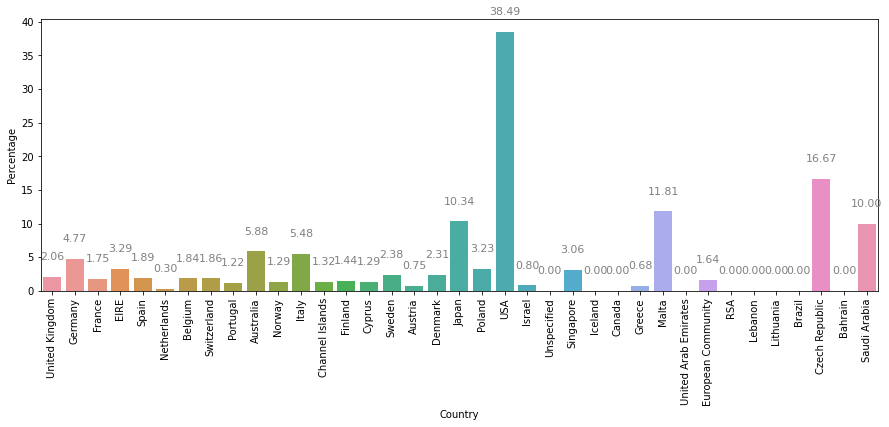

In [34]:
# Percentage of order canceled by contrywise
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="Country", y="Percentage", data=df_merged)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                textcoords='offset points')
plt.xticks(rotation=90)

In [35]:
# Maximum Cancel orders by Cumstomer Number and which contries they belong
df_CustomerID_cancelOders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [36]:
df_cancel_customer = df_CustomerID_cancelOders[["CustomerID", "Country"]].value_counts().reset_index()
df_cancel_customer.head()

,CustomerID,Country,0
0,14911.0,EIRE,225
1,17841.0,United Kingdom,136
2,17511.0,United Kingdom,113
3,15311.0,United Kingdom,112
4,12607.0,USA,101


In [37]:
df_cancel_customer15 = df_cancel_customer.head(15)

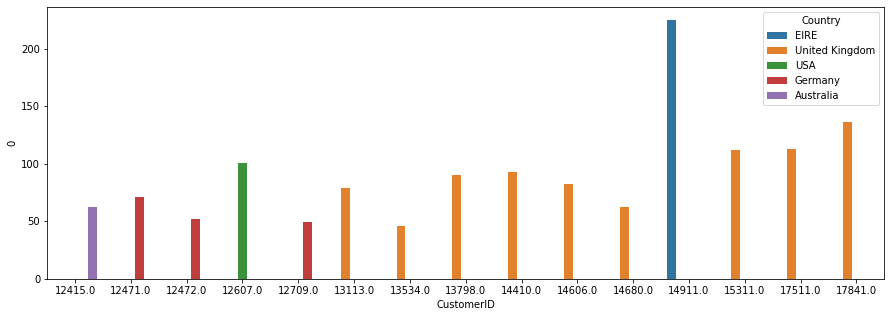

In [38]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="CustomerID", y=0, hue="Country", data=df_cancel_customer15)

In [39]:
#Lets check if there is a counter order before cancel orders

In [40]:
df_cus = df.copy()

In [41]:
df_cus[df_cus['CustomerID'] == 16133]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
71474,542131,21198,WHITE HEART CONFETTI IN TUBE,48,1/25/2011 15:55,0.42,16133.0,United Kingdom
71475,542131,21199,PINK HEART CONFETTI IN TUBE,48,1/25/2011 15:55,0.42,16133.0,United Kingdom
71476,542131,22258,FELT FARM ANIMAL RABBIT,48,1/25/2011 15:55,0.42,16133.0,United Kingdom
71477,542131,84819,DANISH ROSE ROUND SEWING BOX,16,1/25/2011 15:55,0.85,16133.0,United Kingdom
71478,542131,84826,ASSTD DESIGN 3D PAPER STICKERS,60,1/25/2011 15:55,0.21,16133.0,United Kingdom
...,...,...,...,...,...,...,...,...
530103,580808,23295,SET OF 12 MINI LOAF BAKING CASES,8,12/6/2011 11:24,0.83,16133.0,United Kingdom
530104,580808,23293,SET OF 12 FAIRY CAKE BAKING CASES,8,12/6/2011 11:24,0.83,16133.0,United Kingdom
530105,580808,23296,SET OF 6 TEA TIME BAKING CASES,8,12/6/2011 11:24,1.25,16133.0,United Kingdom
530106,580808,23294,SET OF 6 SNACK LOAF BAKING CASES,8,12/6/2011 11:24,0.83,16133.0,United Kingdom


In [42]:
#Just try to find out the cancel orders and corresponding orders associated with it 
df_cancel_orders_actual
df_actual_orders_countryWise

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [82]:
# df_true_order = df_actual_orders_countryWise.groupby(['CustomerID', 'StockCode' ])['Quantity'].sum().reset_index()
g= df_actual_orders_countryWise.groupby(['CustomerID', 'StockCode' ])
i = g.sum()
j = g[['InvoiceNo', 'Description', 'Country' ]].first()
df_true_order = pd.concat([i, j], 1).reset_index()
df_true_order.head(10)

,CustomerID,StockCode,Quantity,UnitPrice,InvoiceNo,Description,Country
0,12346.0,23166,0,2.08,541431,MEDIUM CERAMIC TOP STORAGE JAR,United Kingdom
1,12347.0,16008,24,0.25,549222,SMALL FOLDING SCISSOR(POINTED EDGE),Iceland
2,12347.0,17021,36,0.30,556201,NAMASTE SWAGAT INCENSE,Iceland
3,12347.0,20665,6,2.95,549222,RED RETROSPOT PURSE,Iceland
4,12347.0,20719,40,3.40,542237,WOODLAND CHARLOTTE BAG,Iceland
5,12347.0,20780,12,4.65,537626,BLACK EAR MUFF HEADPHONES,Iceland
6,12347.0,20782,6,5.49,537626,CAMOUFLAGE EAR MUFF HEADPHONES,Iceland
7,12347.0,20966,10,1.25,542237,SANDWICH BATH SPONGE,Iceland
8,12347.0,21035,6,2.95,542237,SET/2 RED RETROSPOT TEA TOWELS,Iceland
9,12347.0,21041,12,5.90,542237,RED RETROSPOT OVEN GLOVE DOUBLE,Iceland


In [83]:
df_true_order.shape

(267615, 7)

In [84]:
#dropping zero values in Qualtity also cancelling -ve qualitity since it is not possbile now for any customer to cancel 
# an order before placing an order
df_true_order = df_true_order[df_true_order['Quantity']>0]
df_true_order1 = df_true_order.copy()
df_true_order.shape

(265220, 7)

# Stock Analysis

In [46]:
df_true_order.StockCode.nunique()

3649

In [47]:
df_true_order_copy = df_true_order
df_stock_count = df_true_order_copy['StockCode'].value_counts().to_frame().reset_index()
df_stock_count.shape

(3649, 2)

In [48]:
df_stock_count15 = df_stock_count.head(15)
df_stock_count15

,index,StockCode
0,22423,870
1,85123A,854
2,47566,707
3,84879,677
4,22720,634
5,85099B,632
6,21212,629
7,22086,611
8,22457,586
9,22138,577


In [49]:
df_stock_count15.dtypes

index        object
StockCode     int64
dtype: object

In [50]:
df_true_order.dtypes

CustomerID     float64
StockCode       object
Quantity         int64
UnitPrice      float64
InvoiceNo       object
Description     object
Country         object
dtype: object

In [51]:
#pd.merge(df_stock_count15, df_true_order_copy, how='left', on='index')
#df_stock_count15['StockCode'] = df_stock_count15['index']
df_stock_count15.rename(columns = {'index':'StockCode', 'StockCode':'count'}, inplace = True)

C:\Users\cshashwa\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
df_stock_count15.head()

,StockCode,count
0,22423,870
1,85123A,854
2,47566,707
3,84879,677
4,22720,634


In [53]:
df_true_order_copy.sort_values("StockCode", inplace = True)
df_true_order_copy.drop_duplicates(subset ="StockCode", inplace = True)

In [54]:
df_stock_count15 = pd.merge(df_stock_count15, df_true_order_copy, how='inner', on='StockCode')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(1, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(2, 0, 'PARTY BUNTING'),
  Text(3, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(4, 0, 'SET OF 3 CAKE TINS PANTRY DESIGN '),
  Text(5, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(6, 0, 'PACK OF 72 RETROSPOT CAKE CASES'),
  Text(7, 0, "PAPER CHAIN KIT 50'S CHRISTMAS "),
  Text(8, 0, 'NATURAL SLATE HEART CHALKBOARD '),
  Text(9, 0, 'BAKING SET 9 PIECE RETROSPOT '),
  Text(10, 0, 'SPOTTY BUNTING'),
  Text(11, 0, 'HEART OF WICKER SMALL'),
  Text(12, 0, 'JAM MAKING SET WITH JARS'),
  Text(13, 0, 'JAM MAKING SET PRINTED'),
  Text(14, 0, 'LUNCH BAG RED RETROSPOT')])

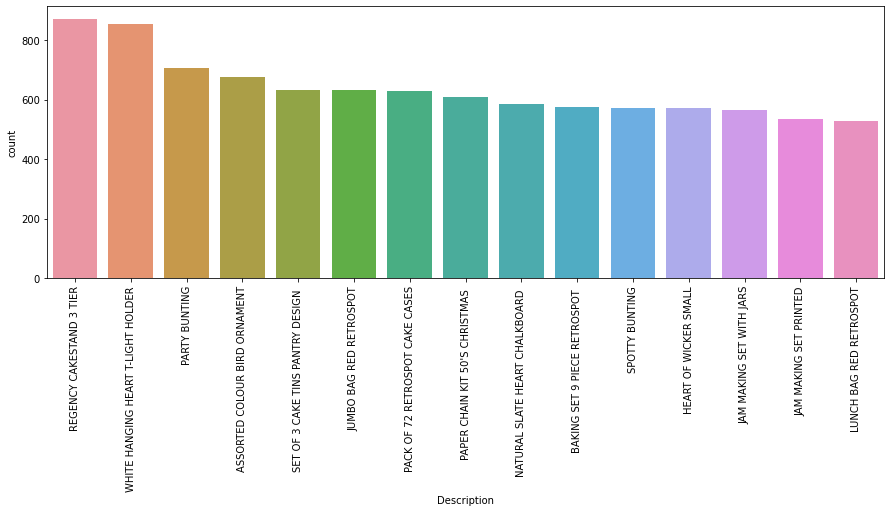

In [55]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = 'Description',
            y = 'count',
            data = df_stock_count15)
plt.xticks(rotation=90)
# for i, v in s.reset_index().iterrows():
#     ax.text(i, v.Country + 0.2 , v.Country, color='red')

In [56]:
df_stockAnalysis = df.copy()

In [57]:
df_stockAnalysis['InvoiceDate'] = pd.to_datetime(df_stockAnalysis['InvoiceDate'])

In [58]:
df_stockAnalysis['InvoiceDate'] = df_stockAnalysis['InvoiceDate'].dt.date

In [59]:
df_datewiseCount = df_stockAnalysis.groupby('InvoiceDate').size()

In [60]:
df_datewiseCount.shape

(305,)

In [61]:
df_datewiseCount = df_datewiseCount.to_frame().reset_index()

In [62]:
df_datewiseCount = df_datewiseCount.rename(columns = {'InvoiceDate' : 'InvoiceDate', 0: 'Count'})

In [63]:
df_datewiseCount.sort_values('Count', ascending=False)

,InvoiceDate,Count
300,2011-12-05,5331
303,2011-12-08,4940
295,2011-11-29,4313
284,2011-11-16,4195
280,2011-11-11,4089
...,...,...
78,2011-03-13,537
15,2010-12-19,522
116,2011-05-01,452
18,2010-12-22,291


In [64]:
df_datewiseCount['InvoiceDate'] = pd.to_datetime(df_datewiseCount['InvoiceDate'])
df_datewiseCount['day_of_week'] = df_datewiseCount['InvoiceDate'].dt.day_name()
df_datewiseCount['MonthName'] = df_datewiseCount['InvoiceDate'].dt.month_name()

In [65]:
df_datewiseCount

,InvoiceDate,Count,day_of_week,MonthName
0,2010-12-01,3108,Wednesday,December
1,2010-12-02,2109,Thursday,December
2,2010-12-03,2202,Friday,December
3,2010-12-05,2725,Sunday,December
4,2010-12-06,3878,Monday,December
...,...,...,...,...
300,2011-12-05,5331,Monday,December
301,2011-12-06,3365,Tuesday,December
302,2011-12-07,2438,Wednesday,December
303,2011-12-08,4940,Thursday,December


In [66]:
df_datewiseCount.sort_values("Count", inplace = True, ascending=False)

In [67]:
df_datewiseCount15 = df_datewiseCount.head(15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '2011-12-05T00:00:00.000000000'),
  Text(1, 0, '2011-12-08T00:00:00.000000000'),
  Text(2, 0, '2011-11-29T00:00:00.000000000'),
  Text(3, 0, '2011-11-16T00:00:00.000000000'),
  Text(4, 0, '2011-11-11T00:00:00.000000000'),
  Text(5, 0, '2011-11-08T00:00:00.000000000'),
  Text(6, 0, '2011-11-22T00:00:00.000000000'),
  Text(7, 0, '2010-12-06T00:00:00.000000000'),
  Text(8, 0, '2011-11-24T00:00:00.000000000'),
  Text(9, 0, '2011-11-17T00:00:00.000000000'),
  Text(10, 0, '2011-11-23T00:00:00.000000000'),
  Text(11, 0, '2011-11-14T00:00:00.000000000'),
  Text(12, 0, '2011-11-30T00:00:00.000000000'),
  Text(13, 0, '2011-11-15T00:00:00.000000000'),
  Text(14, 0, '2011-11-06T00:00:00.000000000')])

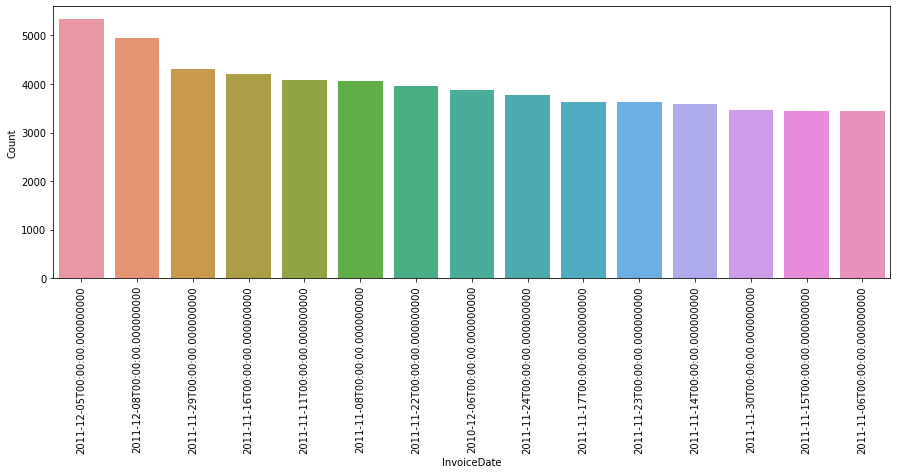

In [68]:
# highest 15 dates of selling maximum stocks
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="InvoiceDate", y="Count", data=df_datewiseCount15)
plt.xticks(rotation=90)

In [69]:
df_monthWise = df_datewiseCount.copy()

In [70]:
g= df_monthWise.groupby(['MonthName'])
i = g.sum()
i = i.reset_index()
i = i.sort_values('Count', ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'November'),
  Text(1, 0, 'December'),
  Text(2, 0, 'October'),
  Text(3, 0, 'September'),
  Text(4, 0, 'July'),
  Text(5, 0, 'May'),
  Text(6, 0, 'June'),
  Text(7, 0, 'March'),
  Text(8, 0, 'August'),
  Text(9, 0, 'January'),
  Text(10, 0, 'April'),
  Text(11, 0, 'February')])

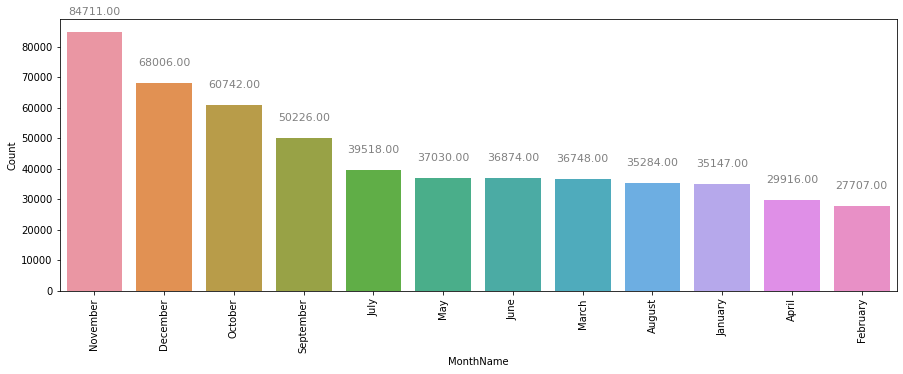

In [71]:
# Percentage of order canceled by contrywise
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="MonthName", y="Count", data=i)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                textcoords='offset points')
plt.xticks(rotation=90)

In [72]:
df_monthWise = df_datewiseCount.copy()
g= df_monthWise.groupby(['day_of_week'])
j = g.sum()
j = j.reset_index()
j = j.sort_values('Count', ascending=False)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Thursday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Monday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Sunday')])

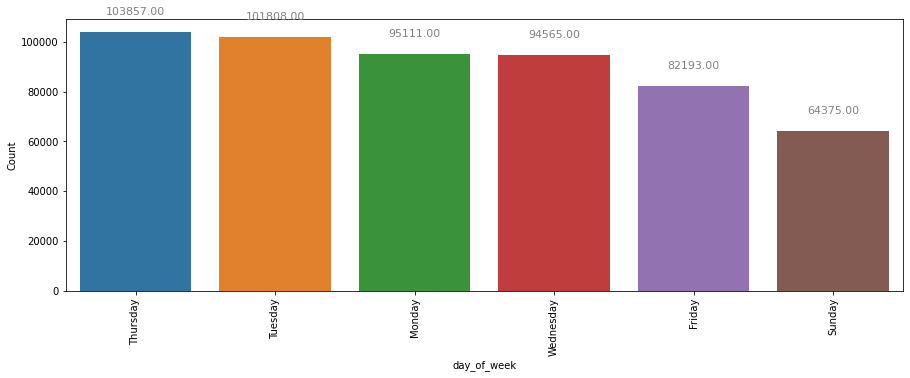

In [73]:
# Percentage of order canceled by contrywise
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="day_of_week", y="Count", data=j)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                textcoords='offset points')
plt.xticks(rotation=90)

In [74]:
df_totalPrice = df_true_order.copy()

In [75]:
df_totalPrice['Total_Price'] = df_totalPrice['Quantity'] * df_totalPrice['UnitPrice'] 

In [76]:
df_totalPrice = df_totalPrice.sort_values('Total_Price', ascending=False)

In [77]:
df_totalPrice = df_totalPrice[df_totalPrice['Total_Price']>1]

In [78]:
df_totalPrice

,CustomerID,StockCode,Quantity,UnitPrice,InvoiceNo,Description,Country,Total_Price
77572,14096.0,DOT,16,11906.36,564764,DOTCOM POSTAGE,United Kingdom,190501.76
193895,16656.0,84508A,1532,21.00,538204,CAMOUFLAGE DESIGN TEDDY,United Kingdom,32172.00
156497,15749.0,47556B,2600,4.65,540818,TEA TIME TEA TOWELS,United Kingdom,12090.00
260847,18102.0,22830,126,39.78,537657,UTILTY CABINET WITH HOOKS,United Kingdom,5012.28
251493,17850.0,22803,17,286.00,536396,IVORY EMBROIDERED QUILT,United Kingdom,4862.00
...,...,...,...,...,...,...,...,...
236756,17585.0,84206A,6,0.19,564049,3 BLACK CATS W HEARTS BLANK CARD,United Kingdom,1.14
232250,17472.0,82581,2,0.55,555249,TOILET METAL SIGN,United Kingdom,1.10
65395,13827.0,79406,5,0.22,561710,FROSTED WHITE BASE,United Kingdom,1.10
109100,14702.0,23308,2,0.55,558636,SET OF 60 VINTAGE LEAF CAKE CASES,United Kingdom,1.10


In [95]:
#Buiding Model
df_model_Data = df_true_order1.copy()
df_model_Data.shape

(265220, 7)

In [96]:
df_model_Data.nunique()

CustomerID      4326
StockCode       3649
Quantity         724
UnitPrice       2697
InvoiceNo      16532
Description     3856
Country           37
dtype: int64

In [97]:
#Dropping Description Column
df_model_Data = df_model_Data.drop(['Description', 'InvoiceNo'], axis=1)
#Feature Selection
#Binning or Encoding

In [98]:
df_model_Data

,CustomerID,StockCode,Quantity,UnitPrice,Country
1,12347.0,16008,24,0.25,Iceland
2,12347.0,17021,36,0.30,Iceland
3,12347.0,20665,6,2.95,Iceland
4,12347.0,20719,40,3.40,Iceland
5,12347.0,20780,12,4.65,Iceland
...,...,...,...,...,...
267610,18287.0,84920,4,3.75,United Kingdom
267611,18287.0,85039A,96,2.90,United Kingdom
267612,18287.0,85039B,120,4.55,United Kingdom
267613,18287.0,85040A,48,3.30,United Kingdom


In [101]:
df_model_Data.to_csv ('export_dataframe.csv', index = False, header=True)